In [43]:
from sklearn.datasets import fetch_openml
import numpy as np

In [44]:
mnist = fetch_openml('mnist_784')

c:\Users\samia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [45]:
x1,y1 = mnist['data'], mnist['target']

In [46]:
x = np.array(x1)
y = np.array(y1)

In [47]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
%matplotlib inline

In [49]:
import matplotlib.pyplot as plt
import matplotlib

In [50]:
some_digit = x[3600]
some_digit_image = some_digit.reshape(28,28) # lets reshape it to plot it


matplotlib.cm.binary colormap is one of the predefined colormaps available in Matplotlib.


(-0.5, 27.5, 27.5, -0.5)

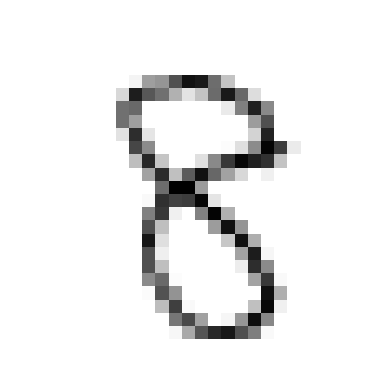

In [51]:
plt.imshow(some_digit_image ,cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis("off")

In [52]:
y[3600]

'8'

In [53]:
x_train, x_test = x[:6000], x[6000:7000]
# values in X

In [54]:
y_train, y_test = y[:6000], y[6000:7000]
# Labels in y

In [55]:
import numpy as np
shuffle_index = np.random.permutation(6000)
x_train , y_train = x_train[shuffle_index], y_train[shuffle_index]

#Creating a 2 decoder

In [56]:
y_train

array(['1', '2', '4', ..., '0', '0', '6'], dtype=object)

In [57]:
y_train = y_train.astype(np.int16)
y_test = y_test.astype(np.int16)
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)

In [58]:
y_train

array([1, 2, 4, ..., 0, 0, 6], dtype=int16)

In [59]:
from sklearn.linear_model import LogisticRegression


In [60]:
clf = LogisticRegression(tol = 0.1,max_iter=6000)

In [61]:
clf.fit(x_train, y_train_2)

LogisticRegression(max_iter=6000, tol=0.1)

In [62]:
clf.predict([some_digit])

array([False])

cv = 3 means mtlb
2 per train kar ky 3 per test kary ga
phir baki 2 per train kar ky 3 per test kary
phir baki 2 per train kar ky bachy hwy per test kary

In [63]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring='accuracy')

In [64]:
a.mean()

0.9548333333333333

In [65]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, x_train, y_train_2, cv=3)

In [66]:
y_train_pred

array([False,  True, False, ..., False, False, False])

## Confusion Matrix

In [67]:
from sklearn.metrics import confusion_matrix


In [68]:
confusion_matrix(y_train_2, y_train_pred)

array([[5264,  155],
       [ 116,  465]], dtype=int64)

In [83]:
cm = confusion_matrix(y_test_2,y_test_2) # perfect result idle condition
#  This is confusion_matrix for perfect pridiction 

Text(95.72222222222221, 0.5, 'Actual')

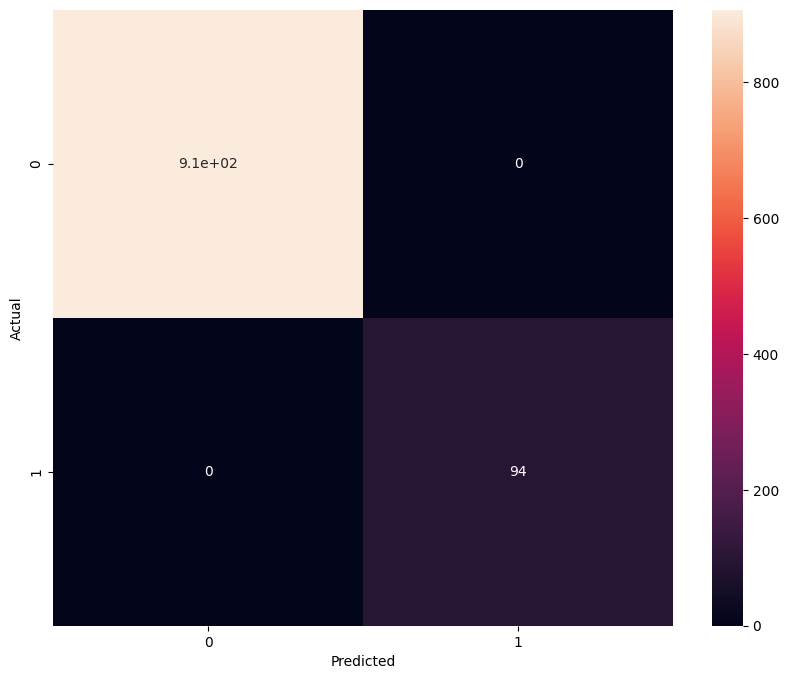

In [85]:
import seaborn as sns 
plt.figure(figsize = (10,8))
sns.heatmap(cm,annot=True )
plt.xlabel("Predicted")
plt.ylabel("Actual")


# Precision and recall

In [70]:
from sklearn.metrics import precision_score, recall_score

In [71]:
precision_score(y_train_2, y_train_pred)
# This is my precision score

0.75

In [72]:
recall_score(y_train_2, y_train_pred)
# this is recall score

0.8003442340791739

# F1-Score

In [73]:
from sklearn.metrics import f1_score

In [74]:
f1_score(y_train_2, y_train_pred)

0.7743547044129893

## Precision Recall curve

In [75]:
from sklearn.metrics import precision_recall_curve

In [76]:
y_scores = cross_val_predict(clf, x_train, y_train_2, cv=3, method='decision_function')

In [77]:
y_scores

array([-38.11924288,  53.45444748, -66.25857653, ..., -96.62995509,
       -52.34991569, -52.23392339])

In [78]:
precisions,recalls, thresholds = precision_recall_curve(y_train_2, y_scores)

In [79]:
precisions

array([0.09683333, 0.09684947, 0.09686562, ..., 1.        , 1.        ,
       1.        ])

In [80]:
recalls

array([1.        , 1.        , 1.        , ..., 0.00344234, 0.00172117,
       0.        ])

In [81]:
thresholds

array([-330.92169077, -314.49989894, -308.41479027, ...,  117.24448479,
        126.28166405,  132.9816377 ])

## Ploting Precisions  Recall Curve

(0.0, 1.0)

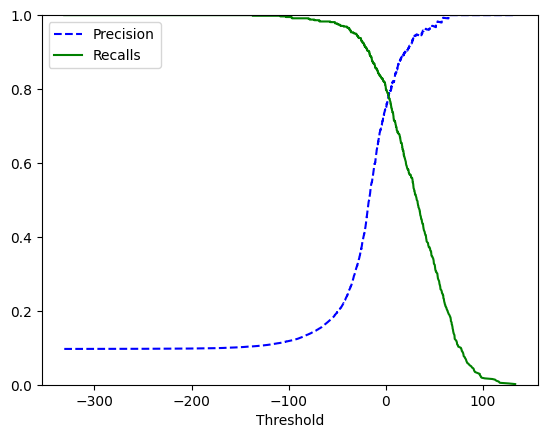

In [82]:
plt.plot(thresholds,precisions[:-1], 'b--',label='Precision',)
plt.plot(thresholds,recalls[:-1], 'g-',label='Recalls',)
plt.xlabel('Threshold')
plt.legend(loc="upper left")
plt.ylim([0,1])